In [1]:
import schemdraw.elements as elm
import schemdraw
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display
%matplotlib inline

# Thermistors

$$ R(T) = R_* \exp \left[ B \left(  \frac{1}{T} - \frac{1}{T_*} \right)  \right] \$$

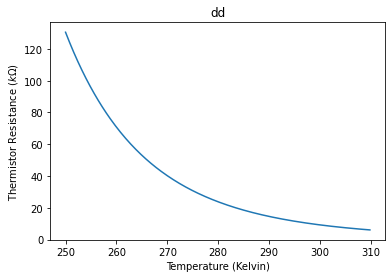

In [2]:
R25 = 1.0e4
T25 = 273.15 + 25.0
B = 3977.0

temp_K = np.arange(250.0, 310.0, 0.2)


def therm_res(T, B, R25, T25):
    R25 = 1.0e4
    T25 = 273.15 + 25.0
    B = 3977.0
    res = R25 * np.exp(B*(1.0/T-1.0/T25))
    return res

r_t = therm_res(temp_K,B,R25,T25)

plt.plot(temp_K,r_t/1000.);
plt.title('dd');
plt.ylabel('Thermistor Resistance ($k\Omega$)');
plt.xlabel('Temperature (Kelvin)');

# Voltage Divider Circuits

## Generic Divider Circuits

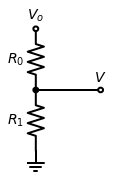

In [3]:
v_divider = schemdraw.Drawing(inches_per_unit=.5, unit=2)
v_divider.add(elm.Dot(open='true', label='$V_o$'))
vdr1 = v_divider.add(elm.Resistor(d='down', label='$R_0$'))
v_divider.add(elm.Dot())
vdr2 = v_divider.add(elm.Resistor(d='down', label='$R_1$'))
v_divider.add(elm.Ground())
v_divider.add(elm.Line('right', xy=vdr1.end, l=v_divider.unit))
v_divider.add(elm.Dot(open='true', label='$V$'))
v_divider.draw()

$$V^{(1)} = V_o \left[ \frac{R_1}{R_0 + R_1} \right] \tag{1}$$

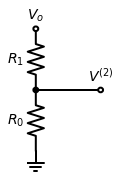

In [4]:
v_divider = schemdraw.Drawing(inches_per_unit=.5, unit=2)
v_divider.add(elm.Dot(open='true', label='$V_o$'))
vdr1 = v_divider.add(elm.Resistor(d='down', label='$R_1$'))
v_divider.add(elm.Dot())
vdr2 = v_divider.add(elm.Resistor(d='down', label='$R_0$'))
v_divider.add(elm.Ground())
v_divider.add(elm.Line('right', xy=vdr1.end, l=v_divider.unit))
v_divider.add(elm.Dot(open='true', label='$V^{(2)}$'))
v_divider.draw()

$$V^{(2)} = V_o \left[ \frac{R_0}{R_0 + R_1} \right] \tag{1}$$

## Thermistor Divider Circuits

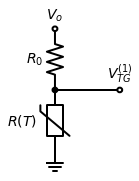

In [5]:
v_divider1 = schemdraw.Drawing(inches_per_unit=.5, unit=2)
v_divider1.add(elm.Dot(open='true', label='$V_o$'))
v1dr1 = v_divider1.add(elm.Resistor(d='down', label='$R_0$'))
v_divider1.add(elm.Dot())
v1dr2 = v_divider1.add(elm.Thermistor(d='down', label='$R(T)$'))
v_divider1.add(elm.Ground())
v_divider1.add(elm.Line('right', xy=v1dr1.end, l=v_divider1.unit))
v_divider1.add(elm.Dot(open='true', label='$V^{(1)}_{TG}$'))
v_divider1.draw()


$$V^{(1)}_{TG} = V_o \left[ \frac{R(T)}{R_0 + R(T)} \right]  \qquad V^{(2)}_{TP} = V_o \left[ \frac{R_0}{R_0 + R(T)} \right]
\tag{1}$$

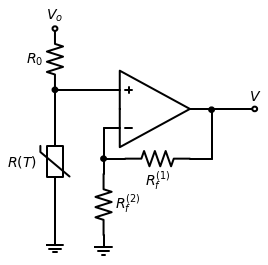

In [6]:
test = schemdraw.Drawing(inches_per_unit=.5, unit=2)
op = test.add(elm.Opamp(flip='true'))
test.add(elm.Line('left', xy=op.in2, l=test.unit))
n1=test.add(elm.Resistor('up',label="$R_0$"))
test.add(elm.Dot(open='true', label='$V_o$'))
test.add(elm.Dot(xy=n1.start))
test.add(elm.Line('down', l=test.unit/1.5))
test.add(elm.Thermistor('down',label="$R(T)$"))
test.add(elm.Line('down', l=test.unit/1.5))
test.add(elm.Ground())
test.add(elm.Line('right', xy=op.out, l=2))
test.add(elm.Dot(open='true', label='$V$'))
test.add(elm.Line('left', xy=op.in1, l=test.unit/4))
test.add(elm.Line('down', l=test.unit/2))
n2=test.add(elm.Dot())
test.add(elm.Line('right', l=test.unit/3))
test.add(elm.Resistor(botlabel='$R_f^{(1)}$'))
test.add(elm.Line('right', l=test.unit/3))
test.add(elm.Line('up', l=test.unit/1.25))
test.add(elm.Dot())
test.add(elm.Line('down',xy=n2.start, l= test.unit/4))
test.add(elm.Resistor(botlabel='$R_f^{(2)}$'))
test.add(elm.Ground())
test.draw()


$$V^{(1)}_{TG} = V_o \left[ \frac{R(T)}{R_0 + R(T)} \right] \times A_G  \qquad V^{(2)}_{TP} = V_o \left[ \frac{R_0}{R_0 + R(T)} \right] \times A_G
\tag{1}$$

with the amplifier gain, $A_G$, defined by the ratio of the feedback resistors via  $A_G = (1 + R_f^{(2)} / R_f^{(1)} ) = (1 + \rho)$.

In [7]:
# Characteristic parameters for the
#  for the Vishay thermistor model
R25 = 1.0e4
B = 3977.0

# Input temperatures in Kelvin
T25 = 273.15 + 25.0
temp_K = np.arange(250.0, 310.0, 0.2)

# Voltage divider: thermistor-to-ground configuration
def div_tg(T, Vin, res0, B, R25, T25):
    res = R25 * np.exp(B*(1.0/T-1.0/T25))
    return res/(res0+res) * Vin

# Voltage divider: thermistor-to-power configuration
def div_tp(T, Vin, res0, B, R25, T25):
    res = R25 * np.exp(B*(1.0/T-1.0/T25))
    return res0/(res0+res) * Vin

def div_plot(R0=10.0,V_in=3.3):
    R25 = 1.0e4
    B = 3977.0
    T25 = 273.15 + 25.0
    temp_K = np.arange(250.0, 310.0, 0.2)
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.plot(temp_K, div_tg(temp_K, V_in, R0*1000., B, R25, T25))

@widgets.interact(
    color=['blue', 'red', 'green'], R0=(0.,100.,2.5),V_in=(1.0,5.0,0.1),A_G=(1.0,2.0,0.05))
def div_plot(V_in=(3.3),R0=(10.),A_G=(0.0)):
    R25 = 1.0e4
    B = 3977.0
    T25 = 273.15 + 25.0
    #temp_K = np.arange(250.0, 310.0, 0.2)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    out_tg=np.clip(A_G*div_tg(temp_K, V_in, R0*1000., B, R25, T25),0,V_in)
    out_tp=np.clip(A_G*div_tp(temp_K, V_in, R0*1000., B, R25, T25),0,V_in)
    
    ax.plot(temp_K,out_tg,label='$V_{TG}$')
    ax.plot(temp_K,out_tp,label='$V_{TP}$')
    plt.ylim(0.,7.0)
    plt.legend()
    plt.title('Outputs from the Amplified Voltage Divider Configurations')
    plt.ylabel('Divider Circuit Output (Volts)')
    plt.xlabel('Temperature (Kelvin)')
    plt.show()

interactive(children=(FloatSlider(value=3.3, description='V_in', max=5.0, min=1.0), FloatSlider(value=10.0, de…

# Bridge Circuits

## Generic Wheatstone Bridge Circuits

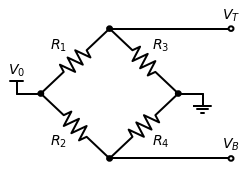

In [8]:
wbridge = schemdraw.Drawing(inches_per_unit=.5, unit=3)
br1 = wbridge.add(elm.Resistor(theta=45, toplabel='$R_1$'))
br_top=wbridge.add(elm.Dot())
#wbridge.add(elm.Vdd(label='$V_0$'))
br2 = wbridge.add(elm.Resistor(theta=-45, toplabel='$R_3$'))
br_right=wbridge.add(elm.Dot())
br3 = wbridge.add(elm.Resistor(theta=-135, botlabel='$R_4$'))
br_bot=wbridge.add(elm.Dot())
#wbridge.add(elm.Ground())
br4 = wbridge.add(elm.Resistor(theta=135, botlabel='$R_2$'))
br_left=wbridge.add(elm.Dot())
#wbridge.add(elm.Line('right', xy=br4.end, l=wbridge.unit/2))
#wbridge.add(elm.Dot(open=True, label='$V_L$'))
#wbridge.add(elm.Line('left', xy=br2.end, l=wbridge.unit/2))
#wbridge.add(elm.Dot(open=True, label='$V_R$'))
wbridge.add(elm.Line('right',xy=br_top.start,l=wbridge.unit*1.25))
wbridge.add(elm.Dot(open=True, label='$V_T$'))
wbridge.add(elm.Line('right',xy=br_bot.start,l=wbridge.unit*1.25))
wbridge.add(elm.Dot(open=True, label='$V_B$'))
wbridge.add(elm.Line('left',xy=br_left.start,l=wbridge.unit/4))
wbridge.add(elm.Vdd(label='$V_0$'))
wbridge.add(elm.Line('right',xy=br_right.start,l=wbridge.unit/4))
wbridge.add(elm.Ground())
wbridge.draw()

$$\Delta V^{(1)} = V^{(1)}_T - V^{(1)}_B = V_0 \left[ \frac{R_3}{R_1 + R_3} - \frac{R_4}{R_2 + R_4} \right] $$

$$\Delta V^{(2)} = V^{(2)}_T - V^{(2)}_B = V_0 \left[ \frac{R_1}{R_1 + R_3} - \frac{R_2}{R_2 + R_4} \right] $$

## Thermistor Bridge Circuits

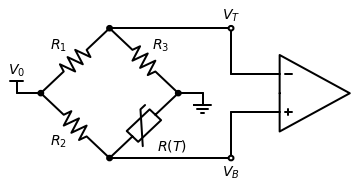

In [9]:
wwbridge = schemdraw.Drawing(inches_per_unit=.5, unit=3)
wbr1 = wwbridge.add(elm.Resistor(theta=45, toplabel='$R_1$'))
wbr_top=wwbridge.add(elm.Dot())
#wbridge.add(elm.Vdd(label='$V_0$'))
wbr2 = wwbridge.add(elm.Resistor(theta=-45, toplabel='$R_3$'))
wbr_right=wwbridge.add(elm.Dot())
wbr3 = wwbridge.add(elm.Thermistor(theta=-135, botlabel='$R(T)$'))
wbr_bot=wwbridge.add(elm.Dot())
#wbridge.add(elm.Ground())
wbr4 = wwbridge.add(elm.Resistor(theta=135, botlabel='$R_2$'))
wbr_left=wwbridge.add(elm.Dot())
#wbridge.add(elm.Line('right', xy=br4.end, l=wbridge.unit/2))
#wbridge.add(elm.Dot(open=True, label='$V_L$'))
#wbridge.add(elm.Line('left', xy=br2.end, l=wbridge.unit/2))
#wbridge.add(elm.Dot(open=True, label='$V_R$'))
wwbridge.add(elm.Line('right',xy=br_top.start,l=wwbridge.unit*1.25))
rn1=wwbridge.add(elm.Dot(open=True, label='$V_T$'))
wwbridge.add(elm.Line('right',xy=wbr_bot.start,l=wwbridge.unit*1.25))
rn2=wwbridge.add(elm.Dot(open=True, botlabel='$V_B$'))
wwbridge.add(elm.Line('left',xy=wbr_left.start,l=wwbridge.unit/4))
wwbridge.add(elm.Vdd(label='$V_0$'))
wwbridge.add(elm.Line('right',xy=wbr_right.start,l=wwbridge.unit/4))
wwbridge.add(elm.Ground())
wwbridge.add(elm.Line('down',xy=rn1.start,l=wwbridge.unit*0.5))
wwbridge.add(elm.Line('right',l=wwbridge.unit*0.5))
O1=wwbridge.add(elm.Opamp(anchor='in1'))
wwbridge.add(elm.Line('up',xy=rn2.start,l=wwbridge.unit*0.5))
wwbridge.add(elm.Line('left', l=wwbridge.unit*0.5, xy=O1.in2))
wwbridge.draw()

$$\Delta V^{(1)}_{TG} = V^{(1)}_T - V^{(1)}_B = V_0 \left[ \frac{R_3}{R_1 + R_3} - \frac{R(T)}{R_2 + R(T)} \right] $$

$$\Delta V^{(1)}_{TP} = V^{(1)}_T - V^{(1)}_B = V_0 \left[ \frac{R_1}{R_1 + R_3} - \frac{R_2}{R_2 + R(T)} \right] $$


In [21]:
# Characteristic parameters for the
#  for the Vishay thermistor model
R25 = 1.0e4
B = 3977.0

# Input temperatures in Kelvin
T25 = 273.15 + 25.0
temp_K = np.arange(250.0, 310.0, 0.2)

# Voltage divider: thermistor-to-power configuration
def div_tp(T, Vin, res0, B, R25, T25):
    res = R25 * np.exp(B*(1.0/T-1.0/T25))
    return res0/(res0+res) * Vin

# Voltage divider: thermistor-to-ground configuration
def bridge_tg(T, Vin, res0, B, R25, T25,R1,R3):
    res = R25 * np.exp(B*(1.0/T-1.0/T25))
    return  -(R3/(R1+R3)-res/(res0+res)) * Vin

# Voltage divider: thermistor-to-power configuration
def bridge_tp(T, Vin, res0, B, R25, T25,R1,R3):
    res = R25 * np.exp(B*(1.0/T-1.0/T25))
    return -(R1/(R1+R3) - res0/(res0+res)) * Vin



@widgets.interact(
    R0=(0.,100.,2.5),R1=(0.,100,5.0),R3=(0.,100,5.0),V_in=(1.0,5.0,0.1),A_G=(1.0,2.0,0.05),V_ref=(0.,5.,.1))
def bridge_plot(V_in=(3.3),R0=(17.5),R1=(20.),R3=(25.),A_G=(1.4),V_ref=(1.6)):
    R25 = 1.0e4
    B = 3977.0
    T25 = 273.15 + 25.0
    #temp_K = np.arange(250.0, 310.0, 0.2)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    out_tg=np.clip(A_G*bridge_tg(temp_K, V_in, R0*1000., B, R25, T25,R1*1000.,R3*1000.)+V_ref,0,V_in)
    out_tp=np.clip(A_G*bridge_tp(temp_K, V_in, R0*1000., B, R25, T25,R1,R3)+V_ref,0,V_in)
    out_div_tp=np.clip(A_G*div_tp(temp_K, V_in, R0*1000., B, R25, T25),0,V_in)
    
    #ax.plot(temp_K,out_tg,label='$V_{TG}$')
    ax.plot(temp_K,out_tp,label='$V_{br}$')
    ax.plot(temp_K,out_div_tp,label='$V_{div}$')
    plt.ylim(0.,3.5)
    plt.legend()
    plt.title('Outputs from the Amplified Voltage Divider Configurations')
    plt.ylabel('Divider Circuit Output (Volts)')
    plt.xlabel('Temperature (Kelvin)')
    plt.show()

interactive(children=(FloatSlider(value=3.3, description='V_in', max=5.0, min=1.0), FloatSlider(value=17.5, de…

In [14]:
# Characteristic parameters for the
#  for the Vishay thermistor model
R25 = 1.0e4
B = 3977.0

# Input temperatures in Kelvin
T25 = 273.15 + 25.0
temp_K = np.arange(250.0, 310.0, 0.2)


# Voltage divider: thermistor-to-power configuration
def div_tp(T, Vin, res0, B, R25, T25):
    res = R25 * np.exp(B*(1.0/T-1.0/T25))
    return res0/(res0+res) * Vin
    
# Voltage divider: thermistor-to-ground configuration
def bridge_tg(T, Vin, res0, B, R25, T25,R1,R3):
    res = R25 * np.exp(B*(1.0/T-1.0/T25))
    return  -(R3/(R1+R3)-res/(res0+res)) * Vin

# Voltage divider: thermistor-to-power configuration
def bridge_tp(T, Vin, res0, B, R25, T25,R1,R3):
    res = R25 * np.exp(B*(1.0/T-1.0/T25))
    return -(R1/(R1+R3) - res0/(res0+res)) * Vin

@widgets.interact(
    color=['blue', 'red', 'green'], R0=(0.,100.,2.5),V_in=(1.0,5.0,0.1),A_G=(1.0,2.0,0.05))
def div_plot(V_in=(3.3),R0=(10.),A_G=(0.0)):
    R25 = 1.0e4
    B = 3977.0
    T25 = 273.15 + 25.0
    #temp_K = np.arange(250.0, 310.0, 0.2)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    #out_tg=np.clip(A_G*div_tg(temp_K, V_in, R0*1000., B, R25, T25),0,V_in)
    out_tp=np.clip(A_G*div_tp(temp_K, V_in, R0*1000., B, R25, T25),0,V_in)
    
    #ax.plot(temp_K,out_tg,label='$V_{TG}$')
    ax.plot(temp_K,out_tp,label='$V_{TP}$')
    plt.ylim(0.,7.0)
    plt.legend()
    plt.title('Outputs from the Amplified Voltage Divider Configurations')
    plt.ylabel('Divider Circuit Output (Volts)')
    plt.xlabel('Temperature (Kelvin)')
    plt.show()

interactive(children=(FloatSlider(value=3.3, description='V_in', max=5.0, min=1.0), FloatSlider(value=10.0, de…

# Note: Thermistor Inflection Point